In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.linalg import eig
import pandas as pd

#### Numpy

In [2]:
M = np.eye(3)
K = np.eye(3) * 2
np.concatenate((M, K), axis=0)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [2., 0., 0.],
       [0., 2., 0.],
       [0., 0., 2.]])

In [3]:
float(np.trace(K)), np.count_nonzero(np.diag(M))

(6.0, 3)

In [4]:
M = np.random.randn(5,3)
K = np.random.randn(5,3)
print(K)
print('\n')
print(M)
print('\n')
K[M < 0] = 0
print(K)

[[-0.22452992 -0.06689555  1.13109201]
 [ 1.14451827 -2.07555927 -0.24683714]
 [-0.7293167  -1.84918077 -0.12425609]
 [-0.26816539 -0.47952171  0.56680213]
 [ 0.85842321  2.71699516 -0.25137021]]


[[-0.92937072 -1.28133564 -0.26212703]
 [-0.00655822 -0.40151627  1.55959579]
 [-0.99995405 -0.94772932  1.26727255]
 [ 0.01184686  0.08506055  0.10868584]
 [ 1.51447025 -1.33297789 -1.01336322]]


[[ 0.          0.          0.        ]
 [ 0.          0.         -0.24683714]
 [ 0.          0.         -0.12425609]
 [-0.26816539 -0.47952171  0.56680213]
 [ 0.85842321  0.          0.        ]]


In [ ]:
M = np.random.randn(5,3)
K = np.random.randn(5,2)
np.dot(np.transpose(M), K)

array([[-0.06592292,  0.23898829],
       [ 1.03151085, -0.64255252],
       [-0.86224256,  6.05581873]])

#### Matplotlib

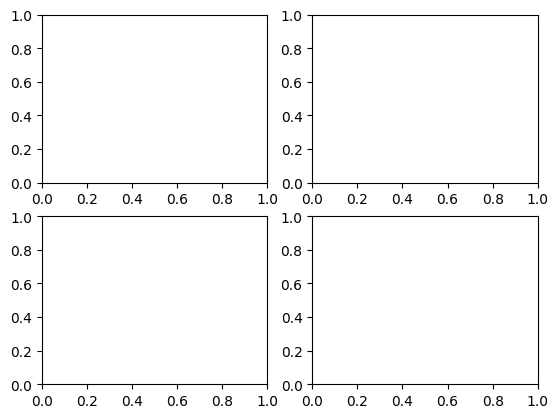

In [6]:
fig, axes = plt.subplots(2, 2)

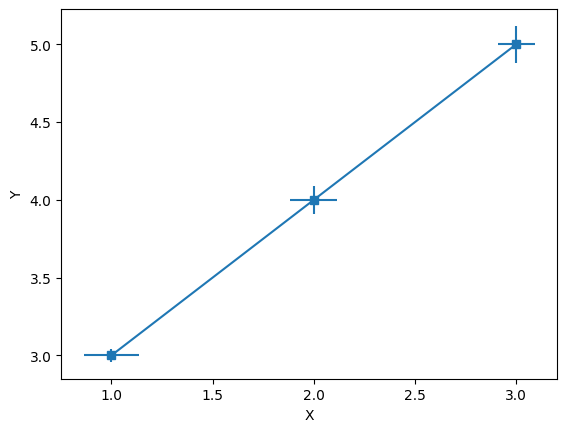

In [7]:
x = [1, 2, 3]
y = [3, 4, 5]
xerr = np.abs(np.random.normal(0, 1e-1, len(x)))
yerr = np.abs(np.random.normal(0, 1e-1, len(x)))

plt.figure()
plt.errorbar(x, y, xerr, yerr, fmt='s-')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

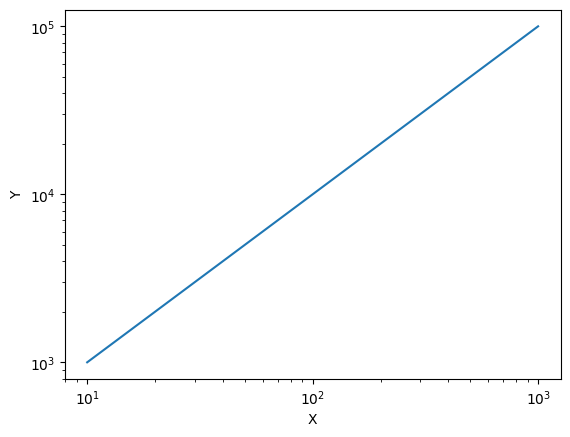

In [ ]:
x = [1e1, 1e2, 1e3]
y = [1e3, 1e4, 1e5]
xerr = np.abs(np.random.normal(0, 1e-1, len(x)))
yerr = np.abs(np.random.normal(0, 1e-1, len(x)))

plt.figure()
plt.loglog(x, y)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

#### Погрешности

##### Задача 1

Оценить погрешность в определении корней уравнения $ay^3 + d = 0$, если величины $a = 1$ и $d = 8$ заданы с точностью $\Delta a = 10^{-3}$ и $\Delta d = 10^{-3}$.

$ay^3 + d = 0 \Rightarrow y^3 = -\frac{d}{a} \Rightarrow y = \sqrt[3]{-\frac{d}{a}}$

Абсолютная погрешность определения корня:
$\Delta y = \left| \frac{\partial y}{\partial a} \right| \Delta a + \left| \frac{\partial y}{\partial d} \right| \Delta d$

Находим частные производные:
$\frac{\partial y}{\partial a} = \frac{\partial}{\partial a} \left( -\sqrt[3]{\frac{d}{a}} \right) = -\frac{1}{3}\left(\frac{d}{a}\right)^{-2/3} \cdot \left(-\frac{d}{a^2}\right) = \frac{d}{3a^2}\left(\frac{d}{a}\right)^{-2/3}$

$\frac{\partial y}{\partial d} = \frac{\partial}{\partial d} \left( -\sqrt[3]{\frac{d}{a}} \right) = -\frac{1}{3}\left(\frac{d}{a}\right)^{-2/3} \cdot \frac{1}{a} = -\frac{1}{3a}\left(\frac{d}{a}\right)^{-2/3}$

$\left| \frac{\partial y}{\partial d} \right| = \left| -\frac{1}{3 \cdot 1}\left(\frac{8}{1}\right)^{-2/3} \right| = \frac{1}{3} \cdot 8^{-2/3} = \frac{1}{3} \cdot \frac{1}{4} = \frac{1}{12}$

$\Delta y = \frac{2}{3} \cdot 10^{-3} + \frac{1}{12} \cdot 10^{-3} = \left(\frac{8}{12} + \frac{1}{12}\right) \cdot 10^{-3} = \frac{9}{12} \cdot 10^{-3} = 0.75 \cdot 10^{-3}$


##### Задача 2


Определить оптимальный шаг численного дифференцирования $h_{\text{opt}}$ при использовании для вычисления производной приближенной формулы:
$
u'(x) \approx \frac{u(x - 2h) - 8u(x - h) + 8u(x + h) - u(x + 2h)}{12h},
$
Какой порядок аппроксимации имеет эта формула? Известно, что $|u^{(5)}(t)| \leq M_5$, а значения функций вычисляются с точностью $\Delta u$.


1. Порядок аппроксимации:

Разложим функции в ряд Тейлора:
$u(x \pm h) = u(x) \pm hu'(x) + \frac{h^2}{2}u''(x) \pm \frac{h^3}{6}u'''(x) + \frac{h^4}{24}u^{(4)}(x) \pm \frac{h^5}{120}u^{(5)}(\xi_1) + O(h^6)$

$u(x \pm 2h) = u(x) \pm 2hu'(x) + 2h^2u''(x) \pm \frac{4h^3}{3}u'''(x) + \frac{2h^4}{3}u^{(4)}(x) \pm \frac{4h^5}{15}u^{(5)}(\xi_2) + O(h^6)$

Подставляя в формулу:
$u(x - 2h) - 8u(x - h) + 8u(x + h) - u(x + 2h) \leq 24hu'(x) + \frac23 M_5 \frac{1}{h^5}$

Следовательно:
$u'(x) = \frac{u(x - 2h) - 8u(x - h) + 8u(x + h) - u(x + 2h)}{12h} + \frac23 M_5 h^4$

Порядок аппроксимации: $O(h^4)$

2. Оптимальный шаг $h_{\text{opt}}$:

Полная погрешность состоит из:
- Погрешность аппроксимации: $\varepsilon_{\text{appr}} = \frac23 M_5h^4$
- Погрешность округления: $\varepsilon_{\text{round}} = \frac{18\Delta u}{12h}$

Полная погрешность:
$\varepsilon(h) = \frac23 M_5h^4 + \frac{18\Delta u}{12h}$

Находим минимум:
$$\frac{d\varepsilon}{dh} = 4\frac23 M_5h^3 - \frac{18\Delta u}{12h^2} = 0$$
$4\frac23 M_5h^5 = \frac{18}{12}\Delta u \Rightarrow h^5 = \frac{9\Delta u}{8M_5}$
$h_{\text{opt}} = \left( \frac{9\Delta u}{8M_5} \right)^{1/5}$


Ответ:
- Порядок аппроксимации: $O(h^4)$
- Оптимальный шаг: $h_{\text{opt}} = \left( \frac{9\Delta u}{8 M_5} \right)^{1/5}$

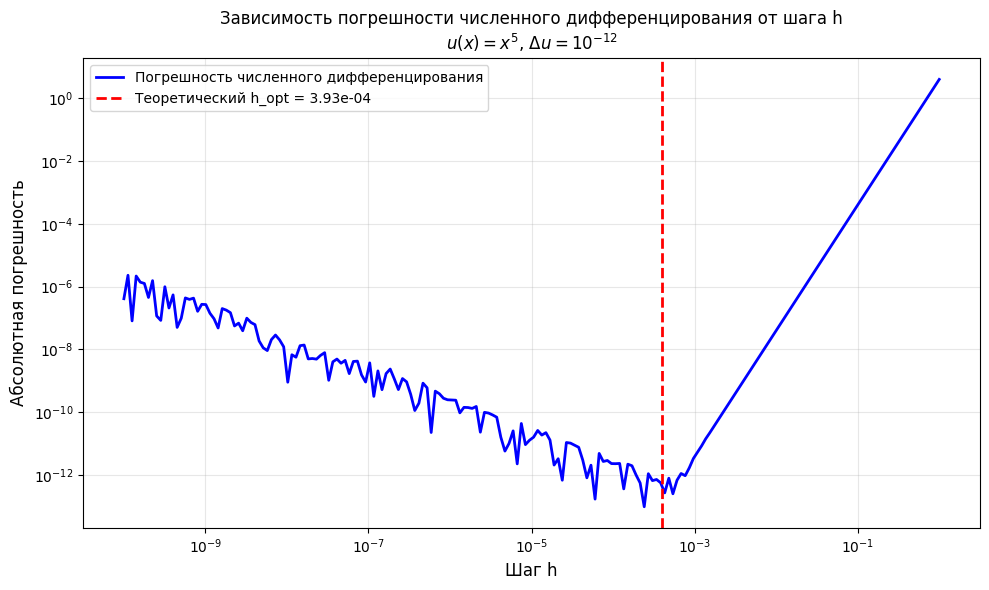

In [11]:
def u(x):
    """Исходная функция u(x) = x^5"""
    return x**5

def u_prime_exact(x):
    """Точная производная u'(x) = 5x^4"""
    return 5*x**4

def numerical_derivative(x, h, func):
    """
    Численная производная по заданной формуле
    u'(x) ≈ [u(x-2h) - 8u(x-h) + 8u(x+h) - u(x+2h)] / (12h)
    """
    return (func(x - 2*h) - 8*func(x - h) + 8*func(x + h) - func(x + 2*h)) / (12*h)

def theoretical_optimal_h(delta_u, M5):
    """Теоретический оптимальный шаг"""
    return (9 * delta_u / (8 * M5)) ** (1/5)

# Параметры эксперимента
x0 = 1.0  # точка, в которой вычисляем производную
M5 = 120.0  # u^(5)(x) = 5! = 120 для полинома x^5
delta_u = 1e-15  # погрешность вычисления функции

h_values = np.logspace(-10, 0, 200)
errors = []

for h in h_values:
    numerical_deriv = numerical_derivative(x0, h, u)
    error = abs(numerical_deriv - exact_deriv)
    errors.append(error)

errors = np.array(errors)

# Построение графика
plt.figure(figsize=(10, 6))
plt.loglog(h_values, errors, 'b-', linewidth=2, label='Погрешность численного дифференцирования')
plt.axvline(x=h_opt_theoretical, color='red', linestyle='--', linewidth=2, 
           label=f'Теоретический h_opt = {h_opt_theoretical:.2e}')

plt.xlabel('Шаг h', fontsize=12)
plt.ylabel('Абсолютная погрешность', fontsize=12)
plt.title('Зависимость погрешности численного дифференцирования от шага h\n' +
         r'$u(x) = x^5$, $\Delta u = 10^{-12}$', fontsize=12)
plt.grid(True, which='both', alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

#### Погрешность определения корня уравнения

Корни уравнения: 
$x_{1,2} = 1 \pm \sqrt{(1 - c)}$ 

$|\frac{\partial x}{\partial c}| = \frac12(1-c)^{-1/2}$  

$\Delta x = |\frac{\partial x}{\partial c}| \Delta c \approx 200 \Delta c$

$\Delta x \leq 10^{-5} \Rightarrow \Delta c \leq 5 \cdot 10^{-8}$

#### Рост погрешности в последовательности

$$x_{n+1} - 5x_n = 4$$
$$5(x_{n} + 1) = (x_{n+1} + 1)$$
$$ (x_{n} + 1) = {5^n} (x_{0} + 1)$$
$$ \Delta x_n = {5^n} \Delta x_0$$
$$ \varepsilon_{xn} = \frac{5^n}{5^nx_0 + 5^n - 1} = 5^n \frac{1}{x_0 + 1 - 5^{-n}}$$

ПРИ ВСЕХ КРОМЕ $$x_0 = -1$$

#### Вигнеровский полукруг


In [9]:
def generate_eigenvalue_histograms(it=1000, N=10, n_bins=50):
    all_eigenvalues = []
    for _ in range(it):
        M = np.random.randn(N, N)
        M += M.T
        e = np.real(eig(M)[0])
        all_eigenvalues.extend(e)
    
    bin_edges = np.linspace(np.min(all_eigenvalues), np.max(all_eigenvalues), n_bins + 1)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    
    histograms = []
    for _ in range(it):
        M = np.random.randn(N, N)
        M += M.T
        e = np.real(eig(M)[0])
        hist, _ = np.histogram(e, bins=bin_edges, density=True)
        histograms.append(hist)
    
    return np.array(histograms), bin_centers

histograms, bin_centers = generate_eigenvalue_histograms(it=100, N=100, n_bins=50)

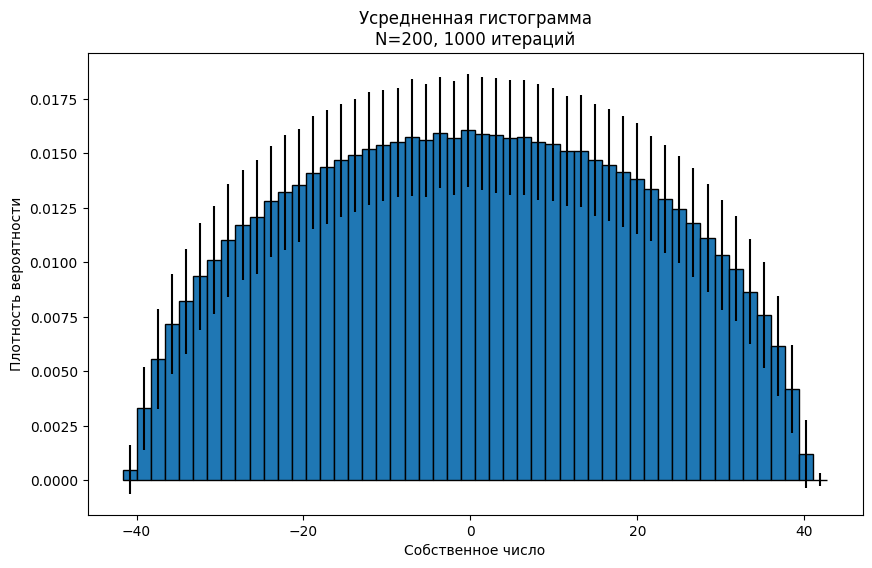

In [15]:
mean_hist = np.mean(histograms, axis=0)
std_hist = np.std(histograms, axis=0)

plt.figure(figsize=(10, 6))
plt.bar(bin_centers, mean_hist, 
        width=bin_centers[1]-bin_centers[0],
        edgecolor='black',
        yerr=std_hist)

plt.xlabel('Собственное число')
plt.ylabel('Плотность вероятности')
plt.title('Усредненная гистограмма\n'
          f'N={200}, {1000} итераций')
plt.show()

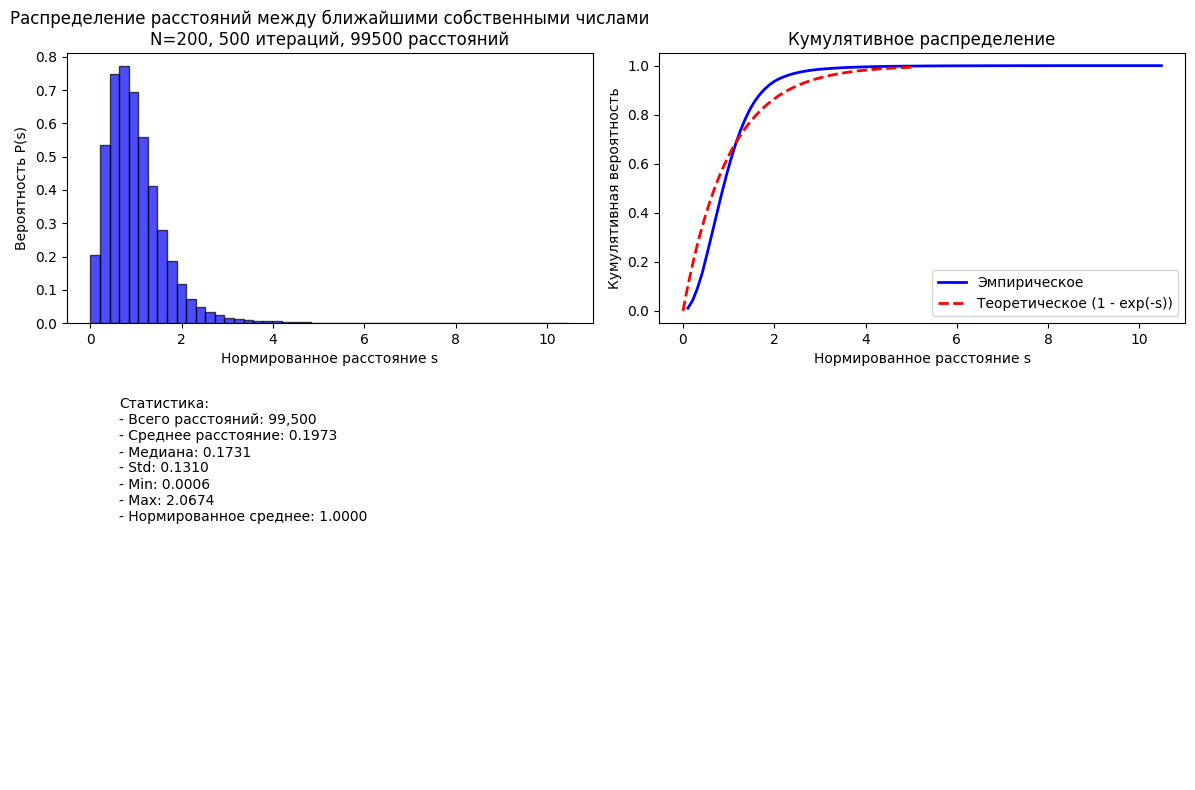

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import eig
from scipy.stats import expon

def nearest_neighbor_spacings(eigenvalues):
    sorted_eig = np.sort(eigenvalues)
    spacings = np.diff(sorted_eig)  
    return spacings

def generate_spacing_data(it=1000, N=100):
    all_spacings = []
    
    for _ in range(it):
        M = np.random.randn(N, N)
        M = (M + M.T) / 2 
        e = np.real(eig(M)[0])
        spacings = nearest_neighbor_spacings(e)
        all_spacings.extend(spacings)
    
    return np.array(all_spacings)

it = 500   
N = 200    
spacings = generate_spacing_data(it=it, N=N)

mean_spacing = np.mean(spacings)
normalized_spacings = spacings / mean_spacing

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
n, bins, patches = plt.hist(normalized_spacings, bins=50, density=True, 
                           alpha=0.7, color='blue', edgecolor='black')
plt.xlabel('Нормированное расстояние s')
plt.ylabel('Вероятность P(s)')
plt.title('Распределение расстояний между ближайшими собственными числами\n'
          f'N={N}, {it} итераций, {len(spacings)} расстояний')


plt.subplot(2, 2, 2)
counts, bin_edges = np.histogram(normalized_spacings, bins=100, density=True)
cdf = np.cumsum(counts) * np.diff(bin_edges)[0]
plt.plot(bin_edges[1:], cdf, 'b-', linewidth=2, label='Эмпирическое')
plt.plot(x, 1 - np.exp(-x), 'r--', linewidth=2, label='Теоретическое (1 - exp(-s))')
plt.xlabel('Нормированное расстояние s')
plt.ylabel('Кумулятивная вероятность')
plt.title('Кумулятивное распределение')
plt.legend()

plt.subplot(2, 2, 3)
plt.axis('off')
stats_text = f'''
Статистика:
- Всего расстояний: {len(spacings):,}
- Среднее расстояние: {mean_spacing:.4f}
- Медиана: {np.median(spacings):.4f}
- Std: {np.std(spacings):.4f}
- Min: {np.min(spacings):.4f}
- Max: {np.max(spacings):.4f}
- Нормированное среднее: {np.mean(normalized_spacings):.4f}
'''
plt.text(0.1, 0.9, stats_text)

plt.tight_layout()
plt.show()


In [23]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import eig
from scipy.optimize import curve_fit

def generate_real_symmetric_matrix(N):
    M = np.random.randn(N, N)
    return (M + M.T) / 2

def generate_complex_hermitian_matrix(N):
    M = np.random.randn(N, N) + 1j * np.random.randn(N, N)
    return (M + M.conj().T) / 2

def get_nearest_neighbor_spacings(matrix, is_complex=False):
    if is_complex:
        e = np.real(eig(matrix)[0])
    else:
        e = np.real(eig(matrix)[0])
    
    sorted_eig = np.sort(e)
    spacings = np.diff(sorted_eig)
    return spacings

def collect_spacings(m=1000, N=100, is_complex=False):
    all_spacings = []
    
    for _ in range(m):
        if is_complex:
            matrix = generate_complex_hermitian_matrix(N)
        else:
            matrix = generate_real_symmetric_matrix(N)
        
        spacings = get_nearest_neighbor_spacings(matrix, is_complex)
        all_spacings.extend(spacings)
    
    return np.array(all_spacings)

m = 100  
N = 200   

spacings_real = collect_spacings(m=m, N=N, is_complex=False)
mean_spacing_real = np.mean(spacings_real)
normalized_real = spacings_real / mean_spacing_real

spacings_complex = collect_spacings(m=m, N=N, is_complex=True)
mean_spacing_complex = np.mean(spacings_complex)
normalized_complex = spacings_complex / mean_spacing_complex

Вещественный случай: оптимальный параметр a = 1.8043 (теоретически π/2 ≈ 1.5708)
Комплексный случай: оптимальный параметр a = 2.7315 (теоретически 32/9π ≈ 1.1318)


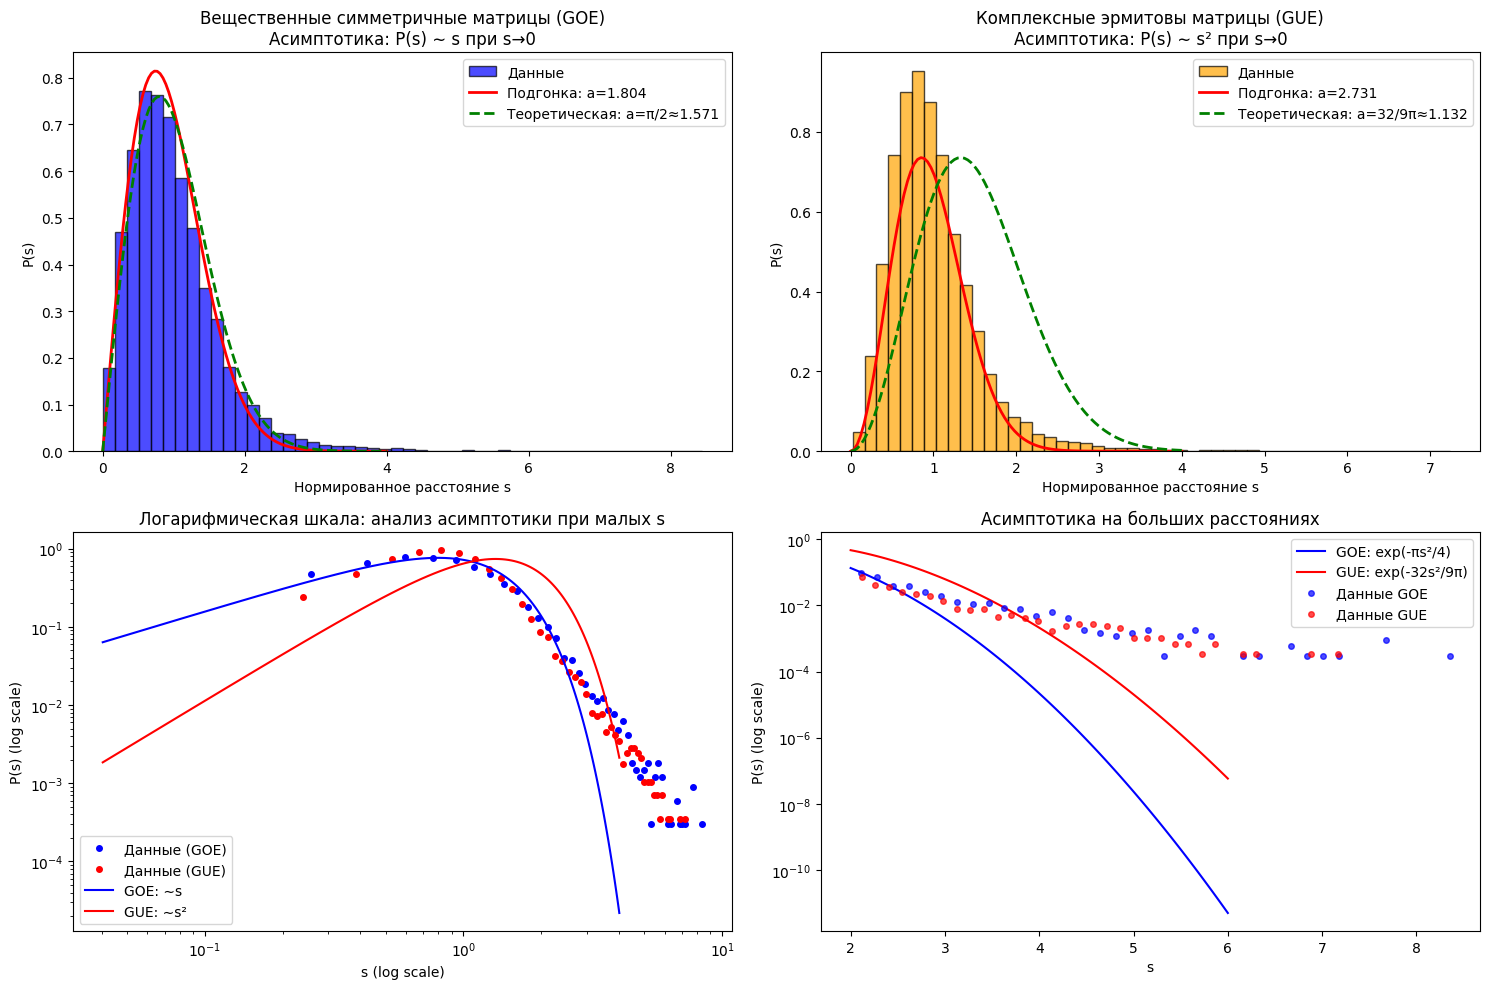

АНАЛИЗ АСИМПТОТИКИ:
1. При s → 0:
   GOE: P(s) ∼ s (линейное подавление)
   GUE: P(s) ∼ s² (квадратичное подавление)
2. При s → ∞:
   GOE: P(s) ∼ exp(-πs²/4) (гауссово decay)
   GUE: P(s) ∼ exp(-32s²/9π) (гауссово decay)


In [24]:
def wigner_surmise_real(s, a):
    return a * s * np.exp(-a * s**2 / 2)

def wigner_surmise_complex(s, a):
    return a * s**2 * np.exp(-a * s**2 / 2)

hist_real, bin_edges_real = np.histogram(normalized_real, bins=50, density=True)
bin_centers_real = (bin_edges_real[:-1] + bin_edges_real[1:]) / 2

hist_complex, bin_edges_complex = np.histogram(normalized_complex, bins=50, density=True)
bin_centers_complex = (bin_edges_complex[:-1] + bin_edges_complex[1:]) / 2

popt_real, _ = curve_fit(wigner_surmise_real, bin_centers_real, hist_real, p0=[np.pi/2])
popt_complex, _ = curve_fit(wigner_surmise_complex, bin_centers_complex, hist_complex, p0=[32/(9*np.pi)])

print(f"Вещественный случай: оптимальный параметр a = {popt_real[0]:.4f} (теоретически π/2 ≈ {np.pi/2:.4f})")
print(f"Комплексный случай: оптимальный параметр a = {popt_complex[0]:.4f} (теоретически 32/9π ≈ {32/(9*np.pi):.4f})")

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.hist(normalized_real, bins=50, density=True, alpha=0.7, 
         color='blue', edgecolor='black', label='Данные')
s = np.linspace(0, 4, 100)
plt.plot(s, wigner_surmise_real(s, popt_real[0]), 'r-', linewidth=2, 
         label=f'Подгонка: a={popt_real[0]:.3f}')
plt.plot(s, wigner_surmise_real(s, np.pi/2), 'g--', linewidth=2, 
         label=f'Теоретическая: a=π/2≈{np.pi/2:.3f}')
plt.xlabel('Нормированное расстояние s')
plt.ylabel('P(s)')
plt.title('Вещественные симметричные матрицы (GOE)\nАсимптотика: P(s) ∼ s при s→0')
plt.legend()

plt.subplot(2, 2, 2)
plt.hist(normalized_complex, bins=50, density=True, alpha=0.7, 
         color='orange', edgecolor='black', label='Данные')
plt.plot(s, wigner_surmise_complex(s, popt_complex[0]), 'r-', linewidth=2, 
         label=f'Подгонка: a={popt_complex[0]:.3f}')
plt.plot(s, wigner_surmise_complex(s, 32/(9*np.pi)), 'g--', linewidth=2, 
         label=f'Теоретическая: a=32/9π≈{32/(9*np.pi):.3f}')
plt.xlabel('Нормированное расстояние s')
plt.ylabel('P(s)')
plt.title('Комплексные эрмитовы матрицы (GUE)\nАсимптотика: P(s) ∼ s² при s→0')
plt.legend()

plt.subplot(2, 2, 3)
plt.loglog(bin_centers_real[1:], hist_real[1:], 'bo', markersize=4, label='Данные (GOE)')
plt.loglog(bin_centers_complex[1:], hist_complex[1:], 'ro', markersize=4, label='Данные (GUE)')
plt.loglog(s[1:], wigner_surmise_real(s[1:], np.pi/2), 'b-', label='GOE: ∼s')
plt.loglog(s[1:], wigner_surmise_complex(s[1:], 32/(9*np.pi)), 'r-', label='GUE: ∼s²')
plt.xlabel('s (log scale)')
plt.ylabel('P(s) (log scale)')
plt.title('Логарифмическая шкала: анализ асимптотики при малых s')
plt.legend()

plt.subplot(2, 2, 4)
large_s = np.linspace(2, 6, 100)
plt.semilogy(large_s, wigner_surmise_real(large_s, np.pi/2), 'b-', label='GOE: exp(-πs²/4)')
plt.semilogy(large_s, wigner_surmise_complex(large_s, 32/(9*np.pi)), 'r-', label='GUE: exp(-32s²/9π)')

large_bins_real = bin_centers_real[bin_centers_real > 2]
large_hist_real = hist_real[bin_centers_real > 2]
large_bins_complex = bin_centers_complex[bin_centers_complex > 2]
large_hist_complex = hist_complex[bin_centers_complex > 2]

plt.semilogy(large_bins_real, large_hist_real, 'bo', markersize=4, alpha=0.7, label='Данные GOE')
plt.semilogy(large_bins_complex, large_hist_complex, 'ro', markersize=4, alpha=0.7, label='Данные GUE')

plt.xlabel('s')
plt.ylabel('P(s) (log scale)')
plt.title('Асимптотика на больших расстояниях')
plt.legend()

plt.tight_layout()
plt.show()

print("АНАЛИЗ АСИМПТОТИКИ:")
print("1. При s → 0:")
print(f"   GOE: P(s) ∼ s (линейное подавление)")
print(f"   GUE: P(s) ∼ s² (квадратичное подавление)")
print("2. При s → ∞:")
print(f"   GOE: P(s) ∼ exp(-πs²/4) (гауссово decay)")
print(f"   GUE: P(s) ∼ exp(-32s²/9π) (гауссово decay)")